##  Визуализация: понижение размерности признакового пространства и поиск аномалий на примере задачи предсказания страхового риска



Работем с данными [kaggle-соревнования](https://www.kaggle.com/c/prudential-life-insurance-assessment)
 
 * dataset strahovanie.csv в папке datasets
 
 
 В этом наборе данных вам предоставлено более сотни переменных, описывающих атрибуты соискателей страхования жизни.

__Задача соревнования:__ по характеристикам человека и его заявки на медицинскую страховку предсказать степень риска, характерную для данной страховки.


Целевой признак (степень риска) в задаче номинальный: целые числа от 1 до 8, а метрика качества, предложенная организаторами соревнования, оценивает степень согласованности двух рейтингов. Поэтому задачу можно решать и методами классификации, и методами регрессии (в последнем случае придется округлять предсказания). Это стоит учитывать при анализе результатов визуализации.



In [1]:
import numpy as np

import pandas 
# наши основные библиотеки для визуализаций
from matplotlib import pyplot as plt
import seaborn as sns
# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline
sns.set (color_codes = True) 
# %matplotlib qt

#%matplotlib notebook
data = pandas.read_csv("strahovanie.csv", na_values="NaN")

In [2]:
data.tail()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


Описание признаков на [странице с данными](https://www.kaggle.com/c/prudential-life-insurance-assessment/data). 


Variable	Description

Id	- Уникальный идентификатор, связанный с приложением.

Product_Info_1-7-	Набор нормализованных переменных, относящихся к заявленному продукту.

Ins_Age- Нормативный возраст заявителя 

Ht	-Нормализованный рост заявителя

Wt	- Нормализованный вес  заявителя

BMI	- Нормализованный ИМТ заявителя

Employment_Info_1-6	Набор нормализованных переменных, относящихся к стажу работы соискателя.

InsuredInfo_1-6		Набор нормализованных переменных, предоставляющих информацию о кандидате.

Insurance_History_1-9	Набор нормализованных переменных, относящихся к страховой истории заявителя.

Family_Hist_1-5	Набор нормализованных переменных, относящихся к семейному анамнезу заявителя.

Medical_History_1-41	Набор нормализованных переменных, относящихся к истории болезни заявителя.

Medical_Keyword_1-48	Набор фиктивных переменных, относящихся к наличию / отсутствию медицинского ключевого слова, связанного с приложением.

Response	Это целевая переменная, порядковая переменная, относящаяся к окончательному решению, связанному с приложением.




Резюме: значение известно только для нескольких признаков, для остальных известна только группа, к которой этот признак принадлежит (например, медицинские данные) и тип признака: вещественный, целочисленный или категориальный. П


Создадим три списка признаков, соответствующие их группам: вещественные, целочисленные и категориальные 


Все следующие переменные являются категориальными (номинальными):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26,Медицинская_история_27, Медицинская_история_28, Медицинская_история_29, Медицинская_история_30, Медицинская_история_31, Медицинская_история_33, Медицинская_история_34, Медицинская_история_35, Медицинская_история_36, Медицинская_история_37, Медицинская_история_38, Медицинская_история_40, Медицинская_история_40, Медицинская_история_40, Медицинская_история_40

Следующие переменные являются непрерывными:

Информация о продукте_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

Следующие переменные являются дискретными:

Медицинская_история_1, Медицинская_история_10, Медицинская_история_15, Медицинская_история_24, Медицинская_история_32

Medical_Keyword_1-48 - бинарные переменные.



Уберем признак Id, так как он не несет смысловой нагрузки. 


Если бы типы признаков были не даны, нам бы пришлось вручную просматривать все 128 признаков, чтобы понять, какие значения они принимают. 

In [3]:
# вещественные
real_features = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI", "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                 "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
# целочисленные
discrete_features = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]

#категориальные
cat_features = data.columns.drop(real_features).drop(discrete_features).drop(["Id", "Response"]).tolist()

### Part_1_ Первичный анализ



Сначала рассмотрим числовые признаки, затем - категориальные.

##### Выведем статистики вещественных и целочисленных признаков:

In [4]:
data[discrete_features].describe()

,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
count,50492.000000,557.000000,14785.000000,3801.000000,1107.000000
mean,7.962172,141.118492,123.760974,50.635622,11.965673
std,13.027697,107.759559,98.516206,78.149069,38.718774
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.000000,17.000000,1.000000,0.000000
50%,4.000000,229.000000,117.000000,8.000000,0.000000
75%,9.000000,240.000000,240.000000,64.000000,2.000000
max,240.000000,240.000000,240.000000,240.000000,240.000000


In [5]:
data[real_features].tail()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
59376,0.230769,0.074627,0.709091,0.320084,0.519103,0.020,0.00000,0.025,NaN,0.217391,NaN,0.197183,NaN
59377,0.230769,0.432836,0.800000,0.403766,0.551119,0.100,0.00001,0.350,0.000267,0.565217,NaN,0.478873,NaN
59378,0.076923,0.104478,0.745455,0.246862,0.360969,0.035,0.00000,NaN,NaN,0.173913,NaN,0.126761,NaN
59379,0.230769,0.507463,0.690909,0.276151,0.462452,0.038,NaN,NaN,NaN,NaN,0.372549,0.704225,NaN
59380,0.076923,0.447761,0.781818,0.382845,0.539563,0.123,NaN,0.300,NaN,NaN,0.401961,NaN,0.589286


In [6]:
data[real_features].describe()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,52602.000000,48527.000000,33985.000000,30725.000000,25140.000000,40197.000000,17570.000000
mean,0.328952,0.405567,0.707283,0.292587,0.469462,0.077582,0.006283,0.361469,0.001733,0.474550,0.497737,0.444890,0.484635
std,0.282562,0.197190,0.074239,0.089037,0.122213,0.082347,0.032816,0.349551,0.007338,0.154959,0.140187,0.163012,0.129200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.238806,0.654545,0.225941,0.385517,0.035000,0.000000,0.060000,0.000400,0.362319,0.401961,0.323944,0.401786
50%,0.230769,0.402985,0.709091,0.288703,0.451349,0.060000,0.000000,0.250000,0.000973,0.463768,0.519608,0.422535,0.508929
75%,0.487179,0.567164,0.763636,0.345188,0.532858,0.100000,0.000000,0.550000,0.002000,0.579710,0.598039,0.563380,0.580357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000


Мы видим, что в датасете есть признаки, которые не известны почти для всех объектов. Кроме того, легко проверить, что в выборке нет объектов, для которых известны все признаки, даже если рассматривать только вещественные. Значит, при решении задачи нужно было бы использовать более сложные методы обработки пропусков, чем удаление объектов.

In [7]:
penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


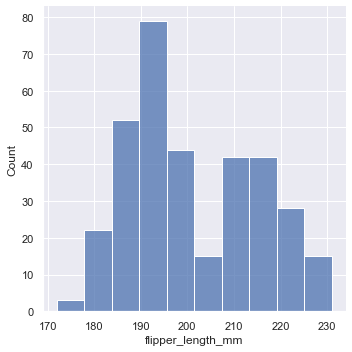

In [8]:
sns.displot(data=penguins, x="flipper_length_mm")

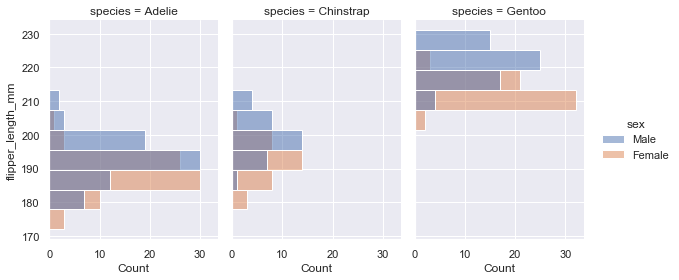

In [9]:
sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",height=4, aspect=.7,
)

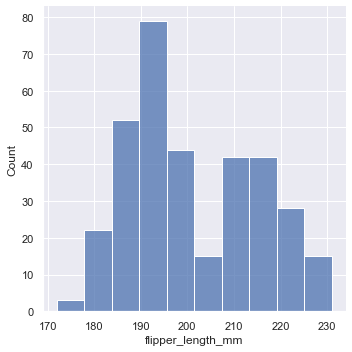

In [10]:
sns.displot(
    data=penguins, x="flipper_length_mm",
    height=5, aspect=1,
)

In [11]:
data[discrete_features].head()

,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,4.0,NaN,240.0,NaN,NaN
1,5.0,NaN,0.0,NaN,NaN
2,10.0,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

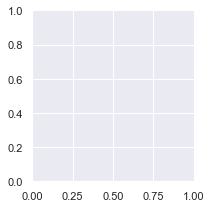

In [11]:
s = sns.FacetGrid(data[discrete_features])
sns.histplot

Среди вещественных есть признаки с очень большим перекосом в сторону какого-то одного значения (например, Employmennt_Info_4), возможно, их стоило бы прологарифмировать при решении задачи. Кроме того, есть признаки со сложной структурой гистограммы. 
Распределения целочисленных признаков (относящихся к группе медицинских) имеют схожую структуру. 

В целом данные разнородны, и описать их одним вероятностным распределением непросто. 

##### Теперь визуализируем признаки попарно. 
Построим scatterplot для пар вещественных признаков. Для этого в seaborn есть функция pairplot. Исключим признаки, распределение которых не похоже на колокол (хотя бы скошенный и неровный), тем самым мы уменьшим размер таблицы пар. На диагоналях таблицы будут стоять оценки распределений признаков (гистограммы или восстановленные плотности, diag_kind="hist" или "kde"). Если указать параметр hue = дискретный целевой признак, то разные его значения будут отображаться разными цветами.

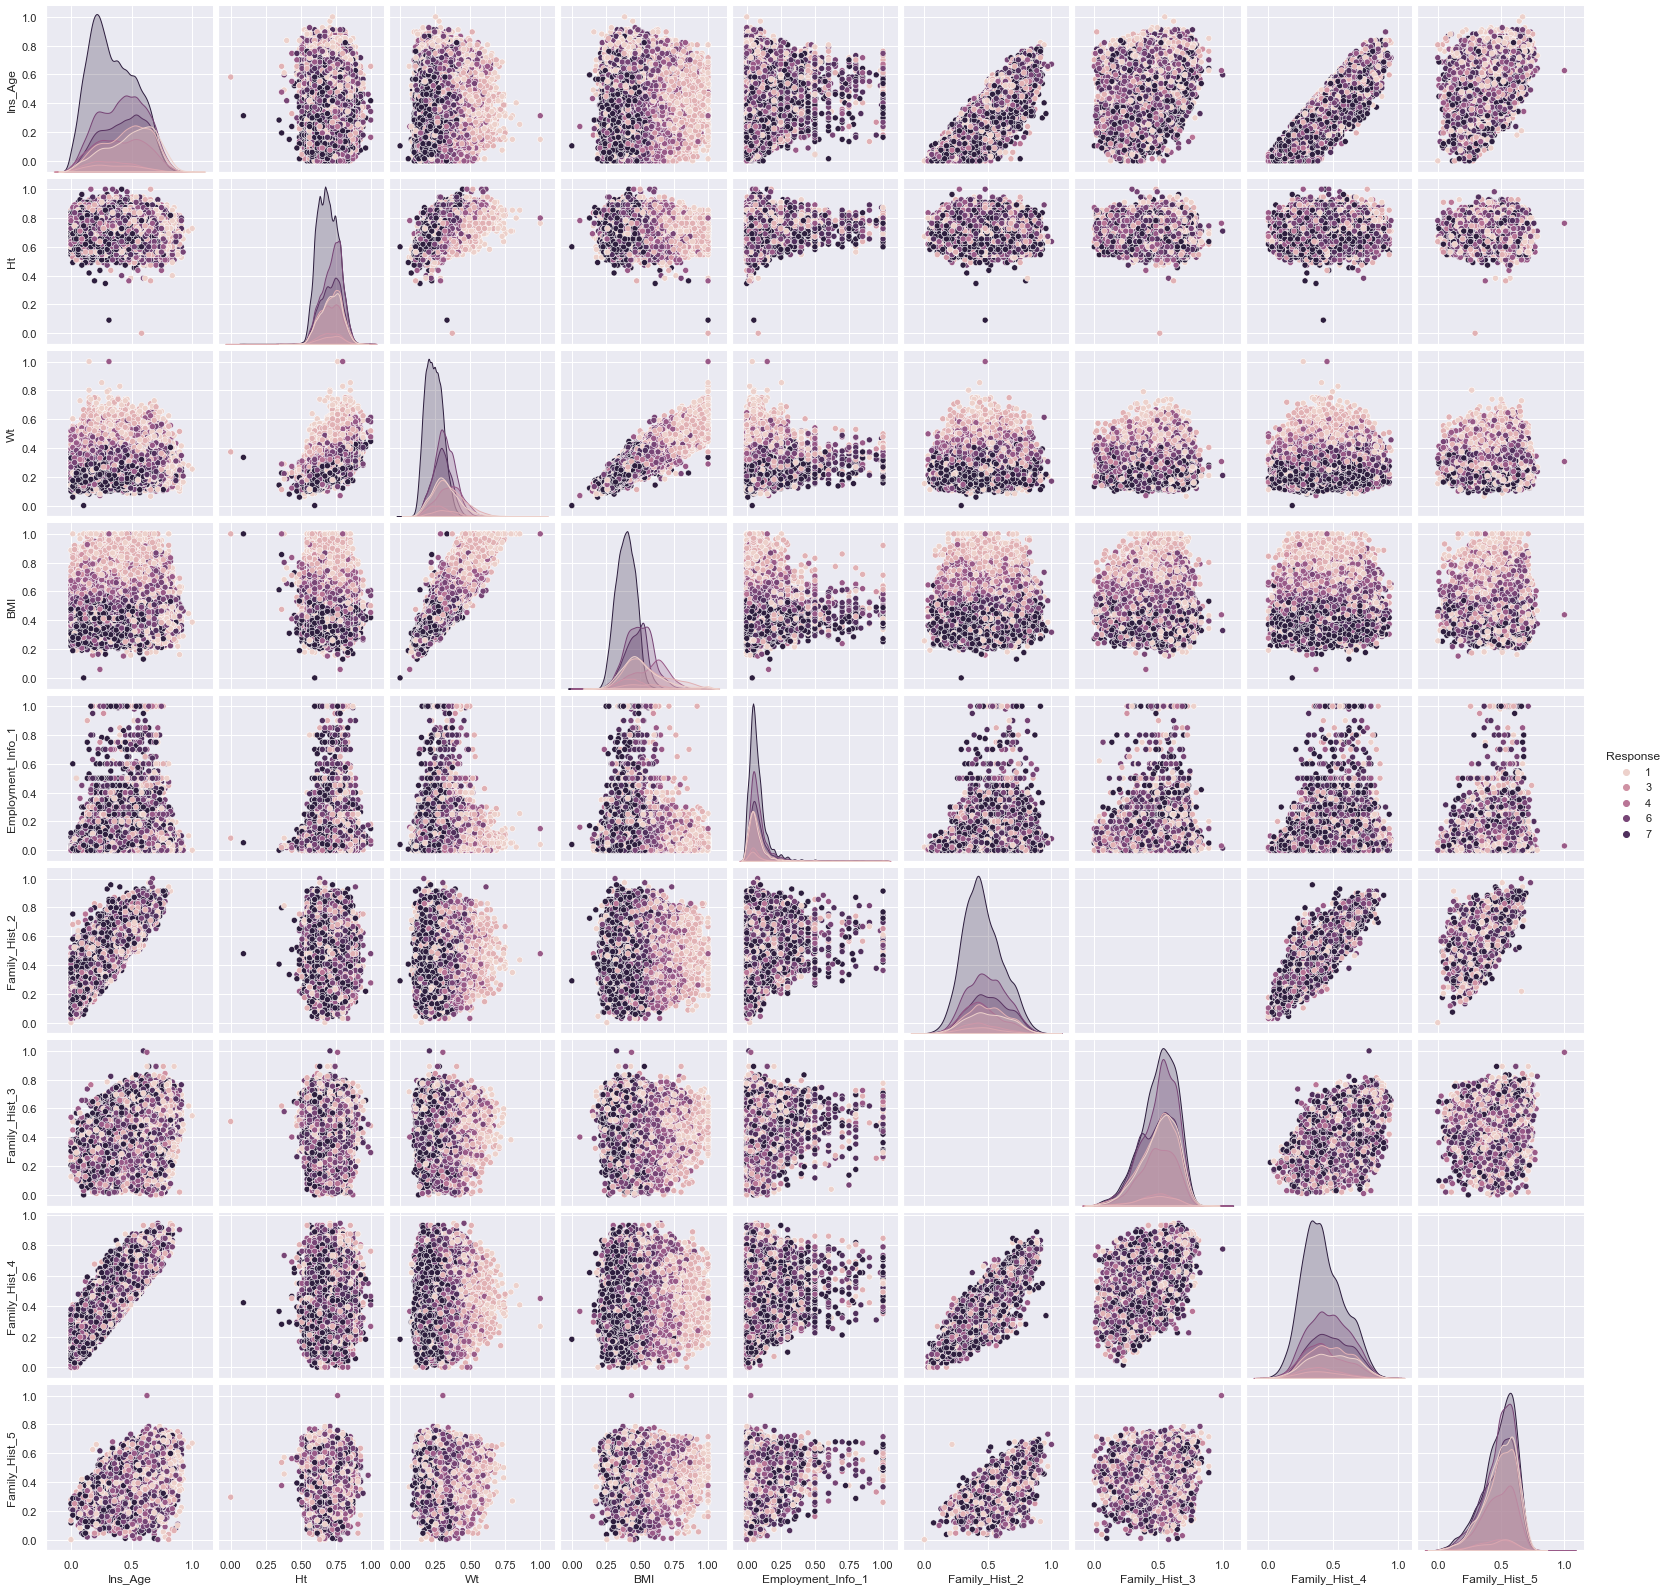

In [45]:
sns.pairplot(data[real_features+["Response"]].drop(
        ["Employment_Info_4", "Employment_Info_6", "Insurance_History_5", "Product_Info_4"], axis=1), 
        hue="Response", diag_kind="kde")

Классы накрывают друг друга, и графики не очень информативны. Но они позволяют ответить на некоторые вопросы о взаимоотношениях признаков и соотношений признаков и классов.

В целом облака точек выглядят достаточно компактно (в неформальном понимании этого слова), их можно приблизить искривленным кругом.

##### Посмотрим на корреляции признаков, чтобы узнать, не нужно ли удалять какие-то признаки перед (гипотетическим) построением модели. 

Для визуализации матрицы попарных корреляций удобно использовать функцию seaborn.heatmap, она автоматически подпишет признаки на осях и покажет colorbar. Мы вычисляем корреляции только между вещественными признаками, для целочисленных признаков корреляции вычисляется по другим формулам.

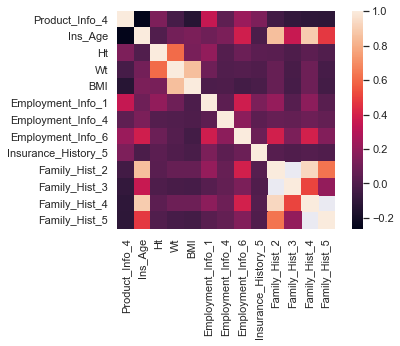

In [12]:
sns.heatmap(data[real_features].corr(), square=True)

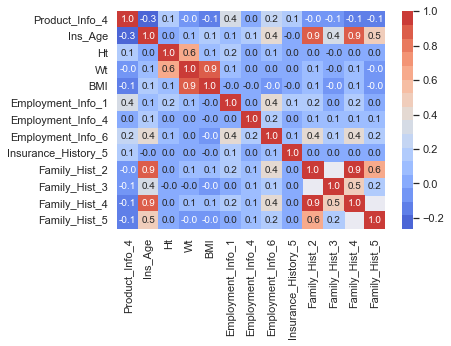

In [13]:
f, ax = plt.subplots()

sns.heatmap(data[real_features].corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

In [14]:
data[real_features].corr() > 0.9

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
Product_Info_4,True,False,False,False,False,False,False,False,False,False,False,False,False
Ins_Age,False,True,False,False,False,False,False,False,False,False,False,False,False
Ht,False,False,True,False,False,False,False,False,False,False,False,False,False
Wt,False,False,False,True,False,False,False,False,False,False,False,False,False
BMI,False,False,False,False,True,False,False,False,False,False,False,False,False
Employment_Info_1,False,False,False,False,False,True,False,False,False,False,False,False,False
Employment_Info_4,False,False,False,False,False,False,True,False,False,False,False,False,False
Employment_Info_6,False,False,False,False,False,False,False,True,False,False,False,False,False
Insurance_History_5,False,False,False,False,False,False,False,False,True,False,False,False,False
Family_Hist_2,False,False,False,False,False,False,False,False,False,True,False,True,False


Перейдем к визуализации категориальных признаков.

##### Посчитаем количество значений для каждого признака.
Строим много графиков вручную (а не с помощью готовой функции, как с hist или pairplot). Для этого создаем новую pyplot-фигуру, указываем, сколько графиков на ней будет, задаем размер; параметр sharey говорит не подписывать все оси отдельно, а подписать их только один раз слева; здесь это уместно, потому что масштабы всех счетчиков одни и те же. 

В цикле по всем категориальным признакам строим countplot признака с помощью seaborn. Указываем параметр data, какой признак визуализировать, а также передаем ссылку на конкретную ячейку таблицы, в которой нужно изобразить график. Признаков всего 108, поэтому последние две ячейки таблицы графиков размером 11 x 10 останутся пустыми.

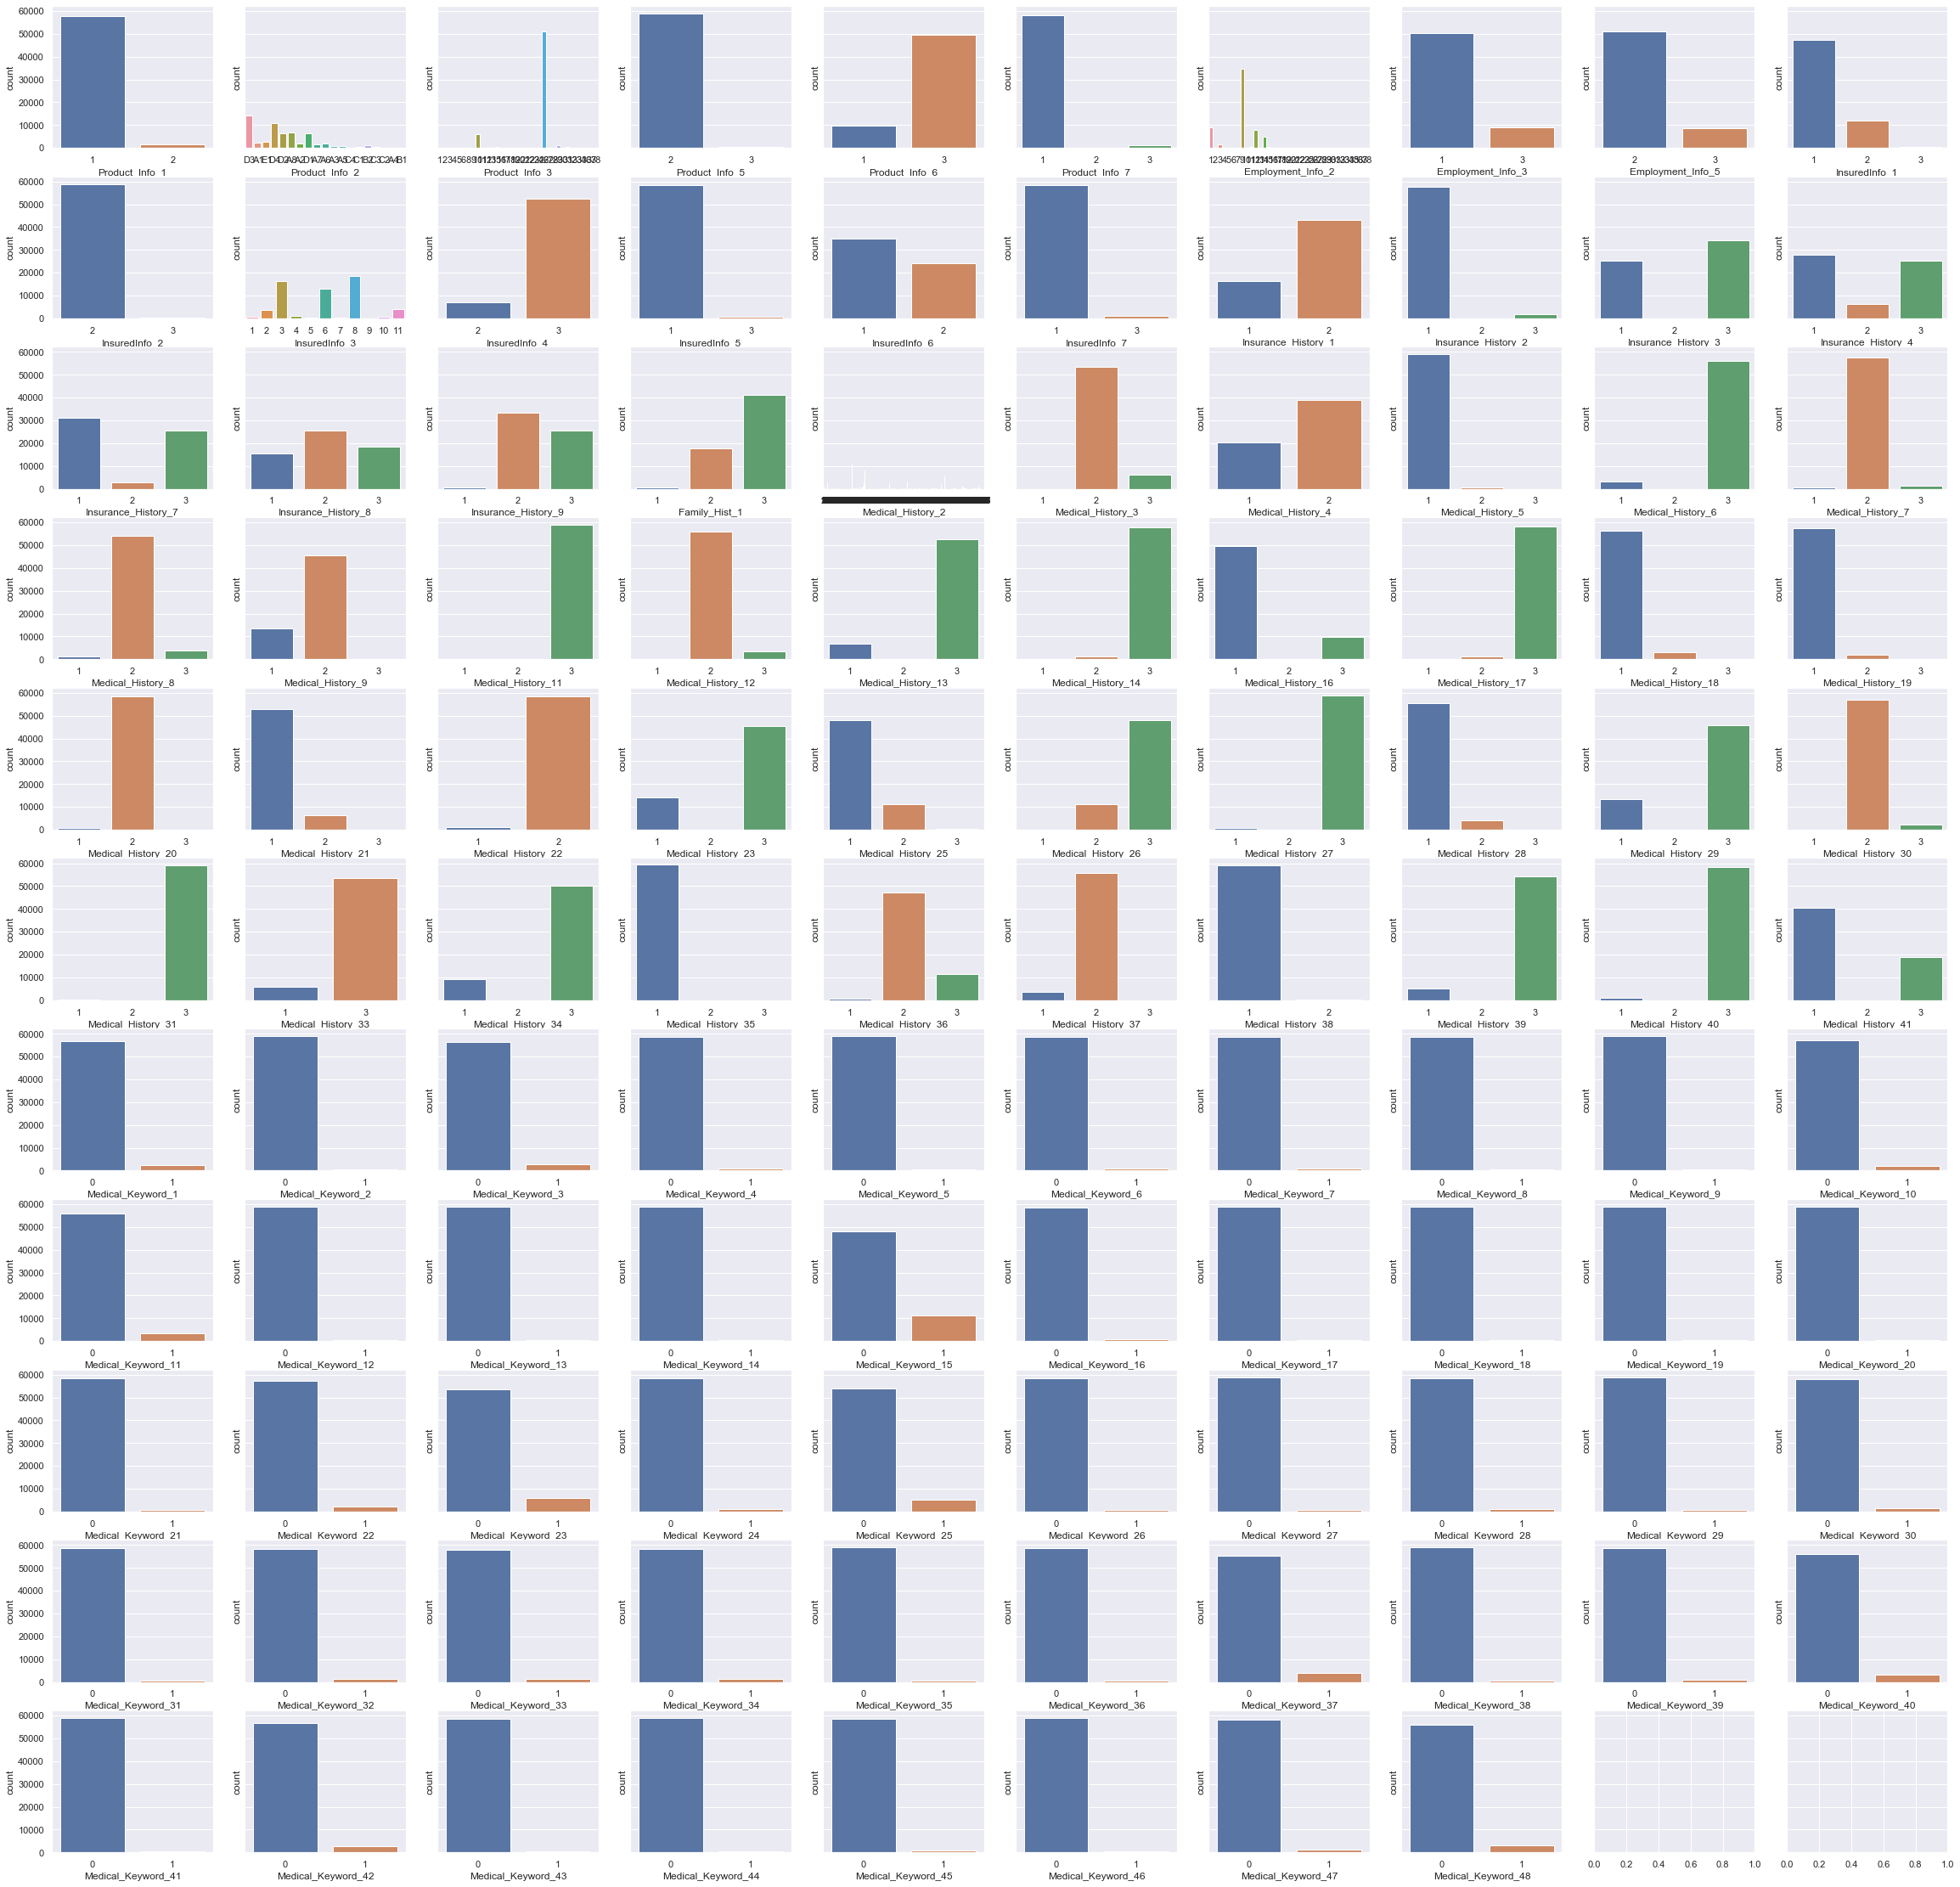

In [15]:
fig, axes = plt.subplots(11, 10, figsize=(40, 40), sharey=True)
for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=data, ax=axes[i // 10, i % 10])

## Задание 7__Ответьте на вопросы __:
* Есть ли среди категориальных признаков константные?
   
   
* Есть ли признаки с количеством возможных категорий (число значений признака) больше 5?
    

In [ ]:
Есть ли среди категориальных признаков константные?
Да, есть. Это те признаки, у которых либо значение одно, либо его нет. Medical History2, Medical Keyword 44

Есть ли признаки с количеством возможных категорий (число значений признака) больше 5?
Да есть, Product Info2, Product Info3, Employment Info2,  

У нас есть много признаков с сильными перекосами в сторону отдельного признака. Учитывая, что среди категориальных признаков много медицинских показателей, можно предположить, что именно эти признаки сильно влияют на увеличение риска (целевой признак). Проверить это предположение можно, построив такие же countplot с разбивкой каждого значения дополнительно по классам (то есть у нас будет несколько групп столбиков, и в каждой группе их будет 8). Это можно сделать, указав параметр hue в этой функции аналогично тому, как мы это делали выше.

Постройте графики countplot для признаков 'Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45' (признаки выбраны случайно) с разбивкой по классам.

In [12]:
##Задание 8. Код 3. Постройте countplot

special_features = ['Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45']


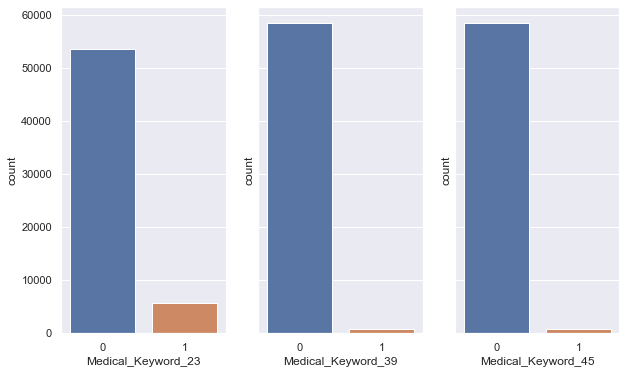

In [13]:
fig1,axes1 = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
for i in range(len(special_features)):
    sns.countplot(x=special_features[i], data=data, ax=axes1[i])

__Ответьте на вопрос __:
* Наличие каких из этих трех факторов сильно повышает риск? Будем считать, что наличие признака сильно повышает риск, если количество человек, имеющих этот признак (то есть он для них равен 1) и отнесенных к категории риска 8, больше, чем такая же величина для любой другой категории риска.
  

##### Наконец, посмотрим на распределение целевого признака, чтобы узнать, сбалансированы ли классы:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


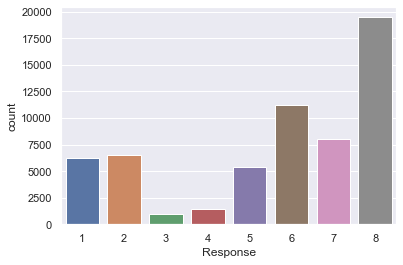

In [14]:
sns.countplot(data.Response)

В категорию 8 люди попадают чаще, чем в другие категории.

## Part_2_ Визуализация многомерных данных с помощью понижения размерности


https://sphere.mail.ru/materials/video/373/

In [ ]:
попробвать построить карты кохонона

Далее можно воспользоваться средствами понижения размерности. Для задачи с дискретным целевым признаком это позволит понять, какие классы хорошо разделяются, а какие - нет.

Такие методы строят матрицу попарных расстояний между объектами, которая в случае, когда объектов много, будет занимать много памяти. Кроме того, отображать много точек на scatter plot (а именно его используют для визуализации результата понижения размерности) неудобно. Поэтому мы перемешаем выборку (и далее будем использовать ее) и выберем првые 1000 объектов для понижения размерности. Вы можете попробовать взять больше объектов.

In [15]:
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

In [16]:
sdata = shuffle(data, random_state=321)
# del data   # удалите неперемешанные данные, если не хватает оперативной памяти

Методы sklearn не принимают матрицы с пропусками (nan). Чтобы избежать этой проблемы, не будем рассматривать признаки, которые имеют много пропусков (последние четыре в списке вещественных признаков). Кроме того, ограничимся рассмотрением вещественных признаков.

В следующей ячейке мы отбираем нужные признаки, затем находим объекты, у которых все признаки известны (нет пропусков в выбранных признаках), а затем создаем отдельно матрицу объекты-признаки для работы методов понижения размерности и отдельно вектор правильных ответов на этих объектах: data_subset и response_subset. Кроме того, мы дополнительно стандартизуем нашу маленькую выборку, потому что методы понижения размерности очень чувствительны к разномасштабным данным (это отдельно указано в [туториале](http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling) в sklearn)

In [17]:
subset_l  = 1000
selected_features = real_features[:-4]
objects_with_nan = sdata.index[np.any(np.isnan(sdata[selected_features].values), axis=1)]   
data_subset = scale(sdata[selected_features].drop(objects_with_nan, axis=0)[:subset_l])
response_subset = sdata["Response"].drop(objects_with_nan, axis=0)[:subset_l]

Будем строить визуализацию методами,  t-SNE и MDS.

In [18]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.

Методы понижения размерности имеют такой же интерфейс, как классификаторы и регрессоры. Для построения визуализации t-SNE нужно создать объект класса и вызвать его метод fit_transform, который вернет матрицу размера число объектов x новая размерность; по умолчанию новая размерность равна 2. 


Выполните эти действия и запишите результат работы метода в переменную tsne_representation.

Ознакомиться с параметрами метода можно на [странице документации TSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE). <font color="red"> Зафиксируйте случайное приближение random_state=321, чтобы результат визуализации у всех был одинаковый. </font> 

In [23]:
# Присвоим переменной tsne_representation результат понижения размерности методом tSNE с параметрами по умолчанию

tsne_representation = TSNE(random_state=321).fit_transform(data_subset)

Визуализируем полученное представление. Для этого создадим набор цветов по количеству классов, а затем в цикле по классам будем отображать представления точек, относящихся к этому классу. Будем указывать параметр alpha=0.5, чтобы сделать точки полупрозрачными, это лучше в ситуации, когда точки накладываются.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

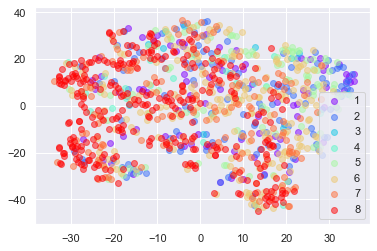

In [24]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(data.Response), colors):
    plt.scatter(tsne_representation[response_subset.values==y, 0], 
                tsne_representation[response_subset.values==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

Теперь сделаем то же с MDS.

In [25]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

In [26]:
# Код 5. Присвойте переменной MDS_transformed результат понижения размерности методом MDS с параметрами по умолчанию
# Не забудьте зафиксировать random_state=321

MDS_transformed = MDS(random_state=321, n_jobs=-1).fit_transform(data_subset)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

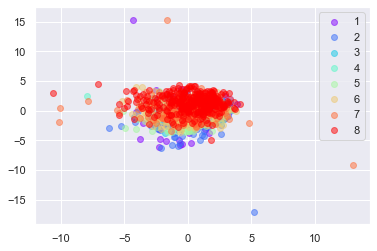

In [27]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed[response_subset.values==y, 0], 
                MDS_transformed[response_subset.values==y, 1], 
                c=c, alpha=0.5, label=str(y))
plt.legend()
#plt.xlim(-5, 5)   # масса точек концентрируется в этом масштабе
#plt.ylim(-5, 5)   # рекомендуем сначала отобразить визуализацию целиком, а затем раскомментировать эти строки.

Для построения представления можно пробовать разные метрики, их список доступен в [документации scipy](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) (потому что sklearn использует метрики scipy). Вы можете попробовать использовать разные метрики в t-SNE и MDS и смотреть получающиеся визуализации



In [28]:
# Присвоим переменной MDS_transformed_cos результат понижения размерности методом MDS с косинусной метрикой
MDS_transformed_cos = MDS(dissimilarity='precomputed').fit_transform(pairwise_distances(data_subset,
                                                                                        metric='cosine',
                                                                                        n_jobs=-1))

In [30]:
pip install minisom

  Stored in directory: C:\Users\Guzel\AppData\Local\pip\Cache\wheels\db\9a\af\0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [46]:
data_subset.shape

(1000, 9)

In [57]:
selected_features

['Product_Info_4',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5']

In [52]:
from minisom import MiniSom    
som = MiniSom(100, 100, 9, sigma=0.3, learning_rate=0.5) # initialization of 8x8 SOM
som.train(data_subset, 100) # trains the SOM with 100 iterations

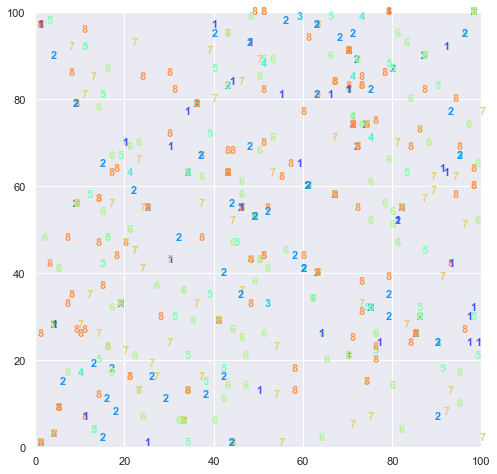

In [53]:
num = response_subset
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data_subset, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('som_digts.png')
plt.show()

In [60]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data_subset, num, stratify=num)

som = MiniSom(10, 10, 9, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(X_train)
som.train_random(X_train, 500, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

           1       0.07      0.05      0.06        21
           2       0.13      0.09      0.11        32
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.13      0.08      0.10        25
           6       0.19      0.20      0.19        51
           7       0.24      0.16      0.19        38
           8       0.45      0.71      0.55        76

    accuracy                           0.30       250
   macro avg       0.15      0.16      0.15       250
weighted avg       0.25      0.30      0.27       250



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Задание 9__Ответьте на вопросы:__ Будем нумеровать визуализации от 1 до 3: tSNE, MDS по умолчанию, MDS с косинусной метрикой.

* Есть ли визуализация, на которой классы хорошо разделяются? Классы хорошо разделяются, если между облаками точек разных классов можно проводить границы. Если есть, укажите хотя бы одну такую визуализацию.
    
* Есть ли визуализации, по которым видно, что объекты с наименьшим риском (1 и 2) отличаются от объектов с высоким риском (7 и 8)? Будем считать, что объекты классов A и B отличаются, если можно выделить область плоскости, в которой в целом больше точек класса A, и можно выделить область, в которой больше точек класса B. Если есть, укажите хотя бы одну такую визуализацию.
   
* Есть ли визуализации, на которым видны отдельно стоящие (от общего облака) точки? Если есть, укажите хотя бы одну такую визуализацию.
    

### Задание 10.  Построить визуализацию методам PCA (Пример Метод главных компонент.ipynb )

In [63]:
# ВАШ КОД 
from sklearn.decomposition import PCA

Projecting 9-dimensional data to 2D


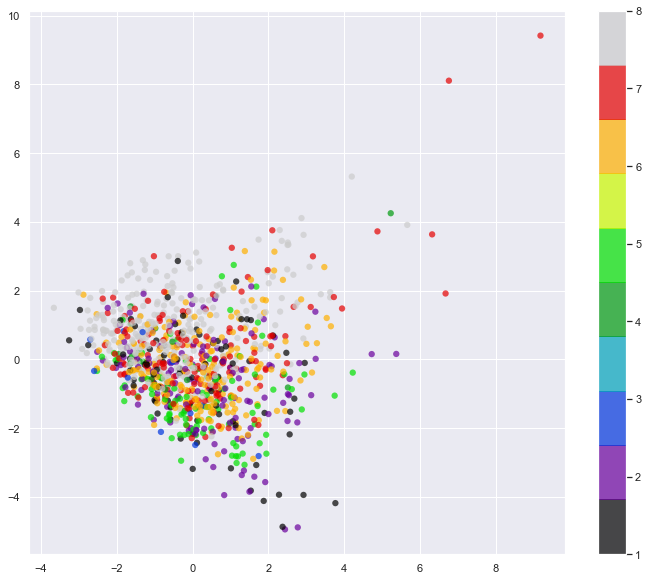

In [65]:
from sklearn.datasets import load_digits

X = data_subset
y = response_subset

pca = PCA(n_components=9)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

## Part_3_ Поиск аномалий



Выявление аномалий (также обнаружение выбросов) — это опознавание во время интеллектуального анализа данных редких данных, событий или наблюдений, которые вызывают подозрения ввиду существенного отличия от большей части данных. 

Обычно аномальные данные превращаются в некоторый вид проблемы, такой как мошенничество в банке, структурный дефект, медицинские проблемы или ошибки в тексте. Аномалии также упоминаются как выбросы, необычности, шум, отклонения или исключения.

Часто выявление аномалий используется для предварительной обработки данных с целью удаления аномалий. При обучении с учителем удаление аномальных данных из набора часто приводит к существенному статистическому увеличению точности


Выбросы являются следствием:

- ошибок в данных (неточности измерения, округления, неверной записи и т.п.)
- наличия шумовых объектов (неверно классифицированных объектов)
- присутствия объектов «других» выборок (например, показаниями сломавшегося датчика).





### Методы обнаружения выбросов:

- Как далеко находится объект от своего k-ого ближайшего соседа
- Какое среднее расстояние от объекта до k ближайших соседей?
- Наблюдение аномально, если его локальная плотность намного меньше локальной плотности его ближайших соседей



1)  статистические подходы (box-plot, гистограмма и т.д.). Как правило, применяют для отдельных признаков и отлавливают экстремальные значения (Extreme-Value Analysis). Для этого используют, например, Z-value или Kurtosis measure.

Многие методы визуализации, например ящик с усами, имеют встроенные средства для детектирования и показа таких экстремальных значений.

2) Модельные тесты 


Идея очень простая – мы строим модель, которая описывает данные. Точки которые сильно отклоняются от модели (на которых модель сильно ошибается) и есть аномалии. При выборе модели мы можем учесть природу задачи, функционал качества и т.п.


3) Метрические методы (мерой аномальности может служить, например «расстояние до k-го соседа»)

Это самые популярные методы среди исследователей. В них постулируется существование некоторой метрики в пространстве объектов, которая и помогает найти аномалии. Интуитивно понятно, что у выброса мало соседей, а у типичной точки много. Поэтому хорошей мерой аномальности может служить, например «расстояние до k-го соседа» (см. метод Local Outlier Factor). Здесь используются специфические метрики, например расстояние Махалонобиса.



4) Методы машинного обучения

Традиционно многие классификационные задачи пытаются решить двух- или многоклассовую ситуацию. Цель приложения машинного обучения - различать тестовые данные между несколькими классами с помощью обучающих данных. Но что, если у вас есть данные только одного класса, и цель состоит в том, чтобы протестировать новые данные и выяснить, похожи они или нет на данные обучения? Методом для этой задачи, который приобрел большую популярность за последние два десятилетия, является машина одноклассных опорных векторов
Задача заключается в том, чтобы определить: является ли данный объект членом некоторого класса (который определяется обучающей выборкой) или нет. 

Таким образом, мы имеем задачу "одноклассовой" классификации, поскольку данных об аномалиях у нас нет (если бы они были, можно было бы решать задачу бинарной классификации - выброс\не выброс). 

Примером такой задачи является детектирование различных сбоев в работе сложных систем: обучающая выборка состоит из данных, описывающих нормальную работу такой системы, а целью является определение ситуаций, в которых что-то работает не так. Если бы мы могли симулировать неправильную работу систему, то можно было бы решать задачу бинарной классификации. Другой пример: мы хотим определять - есть ли на фотографии человек? Мы можем собрать очень большую обучающую выборку, содержащую фотографии людей. Однако какие фотографии следует поместить в выборку "не людей"?

Общая схема таких алгоритмов такова: по обучающей выборке (содержащей только обычные данные), алгоритм строит модель, описывающую её. Если вновь пришедший объект слишком отличается от этой модели по какой-либо метрике, тогда он считается выбросом.



-  AdaBoost - выбросы набирают вес при построении новых моделей, решение - исключаем объекты из выборки, которые быстро набирают вес
- метод опорных векторов для одного класса (OneClassSVM) - скорее алгоритм поиска новизны, а не выбросов, т.к. «затачивается» под обучающую выборку
- изолирующий лес (IsolationForest) - одна из вариаций случайного леса, каждое дерево строится до исчерпании выборки, при разбиении выбирается случайные признак и расщепление, для каждого объекта мера его нормальности – среднее арифметическое глубин листьев, в которые он попал (изолировался)



5) Ансамбли алгоритмов

В методы решения задач обнаружения аномалий также проникла идея «один алгоритм хорошо, а сто лучше», поэтому часто строят много разных алгоритмов. Каждый из них даёт оценку аномальности и эти оценки потом «усредняют».

Поскольку ключевым моментов в реальных задачах обнаружения аномалий является выбор признаков, которые характеризуют те или иные отклонения от нормы, алгоритмы из ансамбля строят пытаясь угадать хорошие пространства. Здесь популярны:

Feature Bagging (не очень удачное название) – для каждого алгоритма берут случайное признаковое подпространство,
Rotated Bagging – в выбранном случайном признаковом подпространстве совершают случайный поворот.
Кстати, здесь «усреднение» не обязательно означает среднее арифметическое всех оценок, интуитивно понятно, что часто может сработать максимум (если какой-то алгоритм уверен в аномальности объекта, то скорее всего так оно и есть).


- Техника выявления аномалий без учителя обнаруживает аномалии в непомеченных наборах тестовых данных при предположении, что большая часть набора данных нормальна, путём поиска представителей, которые меньше подходят к остальному набору данных. 

- Техника выявления аномалий с учителем требует предоставления данных, помеченных как «нормальные» и «ненормальные», и использует обучение классификатора (ключевое отличие от многих других задач классификации заключается в неотъемлемой несбалансированной природе выявления выбросов). Техника выявления аномалий с частичным учителем строит модель, представляющую нормальное поведение из заданного набора нормального тренировочного набора, а затем проверяет правдоподобие полученной модели.


Воспользуемся методами поиска аномалий

##### One class SVM
Для простоты выберем вещественные признаки, которые известны для всех объектов: Product_Info_4, Ins_Age, Ht, Wt, BMI. Оставим только те, которые относятся к человеку, то есть не будем рассматривать Product_Info_4. Получится, что мы отбираем нестандартных по комбинации вес/рост/возраст людей.

In [66]:
from sklearn import svm

In [67]:
person_features = ["Ins_Age", "Ht", "Wt", "BMI"]

Два ключевых параметра OC_SVM - gamma и nu. Первый влияет на то, как хорошо граница будет приближать данные, второй - сколько точек нужно относить к выбросам. Вы можете попробовать разные значения, в том числе, значения по умолчанию, и убедиться, что при них алгоритм работает не очень адекватно. Запустите следующую ячейку, на ее выполнение может понадобиться некоторое время.

In [68]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.01) 
svm_.fit(sdata[person_features])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=10, kernel='rbf',
            max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [69]:
labels = svm_.predict(sdata[person_features])

In [70]:
(labels==1).mean()

0.9899631195163436

У вас должно получиться, что около 98% объектов не признаются выбросами. 

Попытаемся визуализировать, какие объекты отнесены к шумовым. Для этого нужно построить scatter-графики для каждой пары признаков в person_features (всего 6 графиков). На каждом графике нужно отдельно отобразить точки с labels==1 и labels==-1. 

Создадим pyplot-фигуру с 6 графиками: 2 x 3, укажем размер фигуры (12, 8). Затем в цикле по __парам признаков__ из person_features отобразим scatter-графики точек (сделайте точки с разными labels разных цветов: синие, c="blue", - обычные точки, у которых labels==1, красные, c="red",  - шумовые, у которых labels==-1.) 

Для построения графика можно пользуемся командой axes[...].scatter(...)

. Функция scatter принимает два вектора одинаковой длины, абсциссы и ординаты точек, и дополнительные параметры, например, цвет c и коэффициент прозрачности точек alpha. 

Подпишем оси названиями признаков, это можно сделать с помощью команды axes[...].set_xlabel(...) или axes[...].ylabel(...).

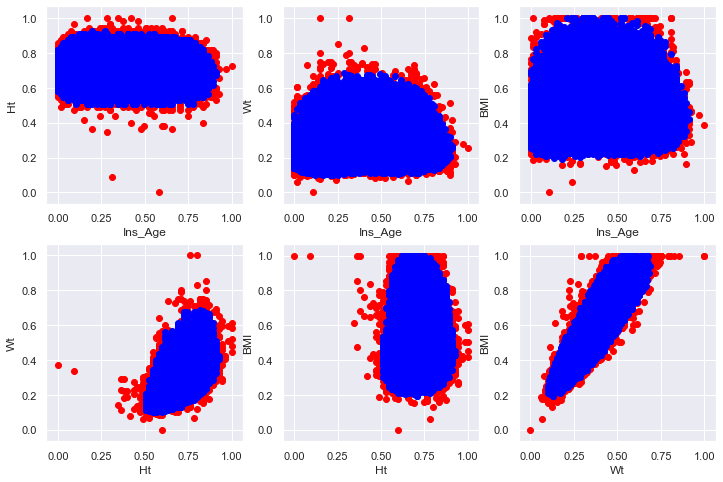

In [71]:
#  Постройм 6 графиков
from itertools import *

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (feature_x, feature_y) in enumerate(combinations(person_features, 2)):
    axes[i // 3][i % 3].scatter(x=sdata.iloc[np.where(labels == -1)[0]].loc[:, feature_x],
                                y=sdata.iloc[np.where(labels == -1)[0]].loc[:, feature_y], c='red')
    axes[i // 3][i % 3].scatter(x=sdata.iloc[np.where(labels == 1)[0]].loc[:, feature_x],
                                y=sdata.iloc[np.where(labels == 1)[0]].loc[:, feature_y], c='blue')
    axes[i // 3][i % 3].set_xlabel(feature_x)
    axes[i // 3][i % 3].set_xlabel(feature_x)
    axes[i // 3][i % 3].set_ylabel(feature_y)

Видим, что, во-первых, облака синие точки заполняют почти все облако точек, а во-вторых, красные точки находятся на границе или далеко от облака (интуитивно понятно, что это аномальные объекты). 

##### Непараметрическое восстановление плотности.
Искать аномалии можно, анализируя непараметрически восстановленную плотность одномерного распределения. Так можно заметить, что какие-то объекты выбиваются из общей тенденции. 

В seaborn это удобно делать с помощью метода distplot. Посмотрев на гистограммы в начале ноутбука, выберем для ближайшего рассмотрения признаки BMI, Employment_Info_1, Medical_History_32. 

Примените метод distplot к этим трем признакам, указав bins=50. Рекомендуется удалять значения nan с помощью метода датафрейма .dropna().

NameError: name 'seaborn' is not defined

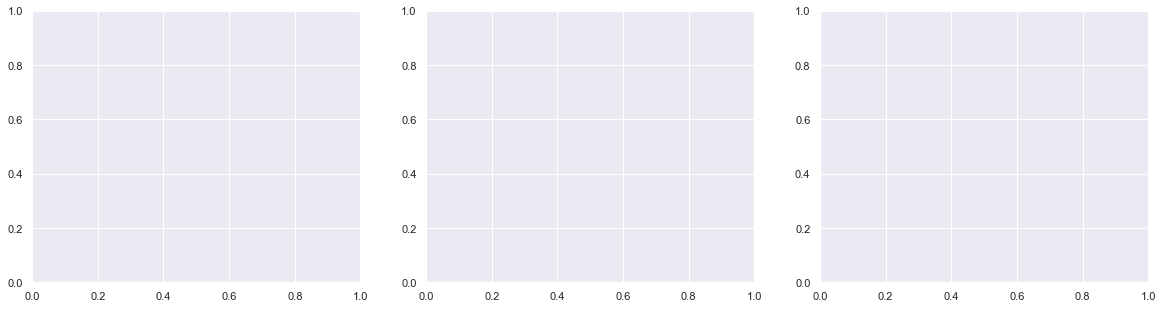

In [72]:
# Восстановите плотности трех для трех указанных признаков
sel_features = ['BMI', 'Employment_Info_1', 'Medical_History_32']
sel_data_dropna = data[sel_features].dropna()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, feature in enumerate(sel_features):
    seaborn.distplot(sel_data_dropna[feature], bins=50, ax=axes[i])

На трех графиках видно, что в конце множества значений признака есть скачок, и это явление очень похоже на аномалию.